## Stroke Prediction using Machine Learning

## Introduction

Stroke is a severe cerebrovascular disease caused by an interruption of blood flow from and to the brain. As a direct consequence of this interruption, the brain is not able to receive oxygen and nutrients for its correct functioning. The other way around, the brain is not able to drain and expel through blood vessels all of its waste, like dead cells. In a question of minutes, the brain is in a critical condition as brain cells will imminently begin to die.

The American Stroke Association indicates that stroke is the fifth cause of death and disability in the United States. For this reason, stroke is considered a severe disease and has been the subject of extensive research, not only in the medical field but also in data science and machine learning studies.

## Dataset Description 

The dataset used in this article contains 5110 records of patients. Each patient has 12 columns each referring to a concrete attribute. Most of these attributes correspond to medical records or the results of clinical trials. Some of the key attributes are hypertension, heart diseases, average glucose levels in the blood, and body mass index (BMI). As we can observe from these first attributes, the dataset provides relevant data regarding the likelihood of patients suffering from stroke disease. It is easy to understand that a patient with high glucose levels and BMI, who has suffered from heart diseases and/or hypertension, is more likely to suffer from stroke. In fact, stroke is also an attribute in the dataset and indicates in each medical record if the patient suffered from a stroke disease or not.

## Data Dictionary -

a) Id - Unique Id 

b) gender

c) age

d) hypertension - Binary Feature e)Heart_disease - Binary Feature

f) Ever_married - Has the patient ever been married 

g) Work_type - Work type of a patient 

h) Residency_type - Residency type of patient

i) avg_glucose_level - Average Glucose level in the blood

j) bmi - Body mass Index

k) smoking_status - Smoking status of the patient 

l)  stroke - stroke event

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mt
from scipy import stats
mt.rcParams['figure.figsize']=[15,10]
import warnings
warnings.filterwarnings('ignore')

In [2]:
stroke=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
stroke.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
stroke.shape

(5110, 12)

In [6]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We have got missing values from the variable 'bmi'

In [7]:
stroke.groupby(['gender','heart_disease','hypertension'])[['bmi']].median()

bmi
gender heart_disease hypertension       
Female 0             0             27.40
                     1             31.90
       1             0             29.30
                     1             30.50
Male   0             0             27.70
                     1             32.00
       1             0             29.80
                     1             30.95
Other  0             0             22.40

In [8]:
stroke.loc[(stroke['bmi'].isnull()) & (stroke['gender']=='Female')&
      (stroke['heart_disease']==0) & (stroke['hypertension']==0),'bmi']=27.4

stroke.loc[(stroke['bmi'].isnull()) & (stroke['gender']=='Female')&
      (stroke['heart_disease']==0) & (stroke['hypertension']==1),'bmi']=31.9

stroke.loc[(stroke['bmi'].isnull()) & (stroke['gender']=='Female')&
      (stroke['heart_disease']==1) & (stroke['hypertension']==0),'bmi']=29.30

stroke.loc[(stroke['bmi'].isnull()) & (stroke['gender']=='Female')&
      (stroke['heart_disease']==1) & (stroke['hypertension']==1),'bmi']=30.50

In [9]:
stroke.loc[(stroke['bmi'].isnull()) & (stroke['gender']=='Male')&
      (stroke['heart_disease']==0) & (stroke['hypertension']==0),'bmi']=27.70

stroke.loc[(stroke['bmi'].isnull()) & (stroke['gender']=='Male')&
      (stroke['heart_disease']==0) & (stroke['hypertension']==1),'bmi']=32.00

stroke.loc[(stroke['bmi'].isnull()) & (stroke['gender']=='Male')&
      (stroke['heart_disease']==1) & (stroke['hypertension']==0),'bmi']=29.80

stroke.loc[(stroke['bmi'].isnull()) & (stroke['gender']=='Male')&
      (stroke['heart_disease']==1) & (stroke['hypertension']==1),'bmi']=30.95

In [10]:
stroke.loc[(stroke['bmi'].isnull()) & (stroke['gender']=='Other')&
      (stroke['heart_disease']==0) & (stroke['hypertension']==0),'bmi']=22.40

In [11]:
stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

We have now cleared the null values by summarizing the BMI based on categories such as gender, heart condition, hypertension.

In [12]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [13]:
stroke['age']=stroke['age'].astype('int')

In [14]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,27.4,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [15]:
stroke.select_dtypes('number').drop(columns=['id','stroke','hypertension','heart_disease']).describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.215264,106.147677,28.890342
std,22.633866,45.283560,7.706276
min,0.000000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.000000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


## Univariate Analysis

In [16]:
num=stroke.select_dtypes('number').drop(columns=['id','stroke','hypertension','heart_disease'])
num.shape[1]

3

In [17]:
num.columns

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

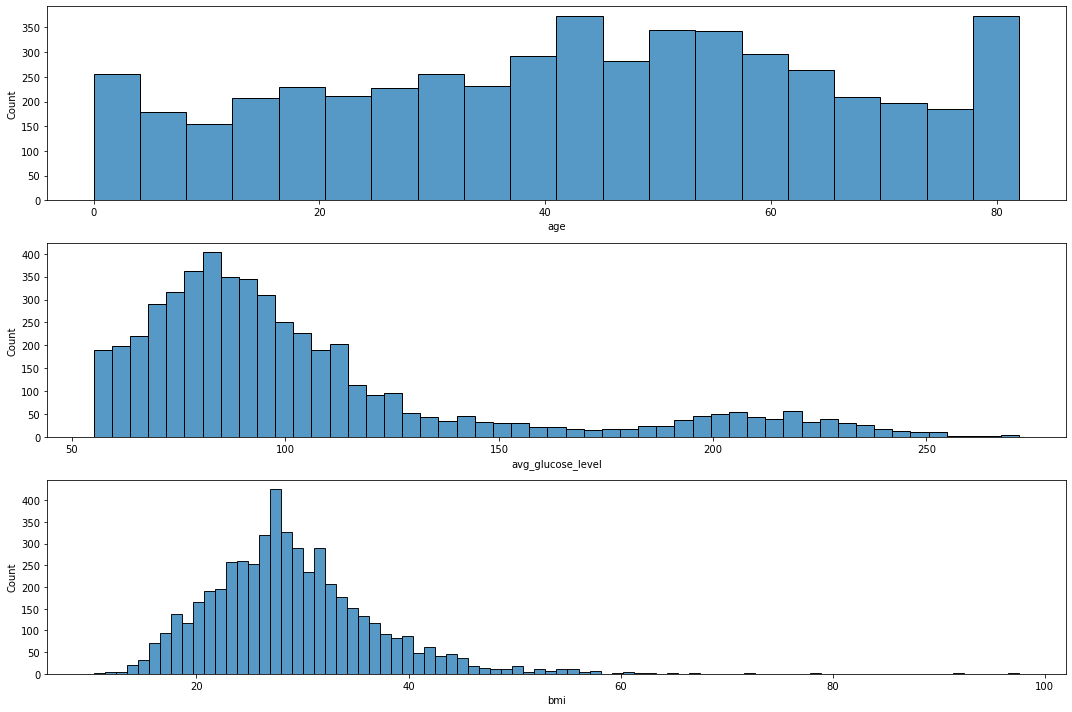

In [18]:
r=3
c=1
itr=1
for i in num.columns:
    mt.subplot(r,c,itr)
    sb.histplot(data=stroke,x=i)
    itr+=1
mt.tight_layout()
mt.show()

* The maximum ages in the dataset are 40 and 80.

* The average glucose level is between 100 to 110.

* The average bmi is between 20 and 30.

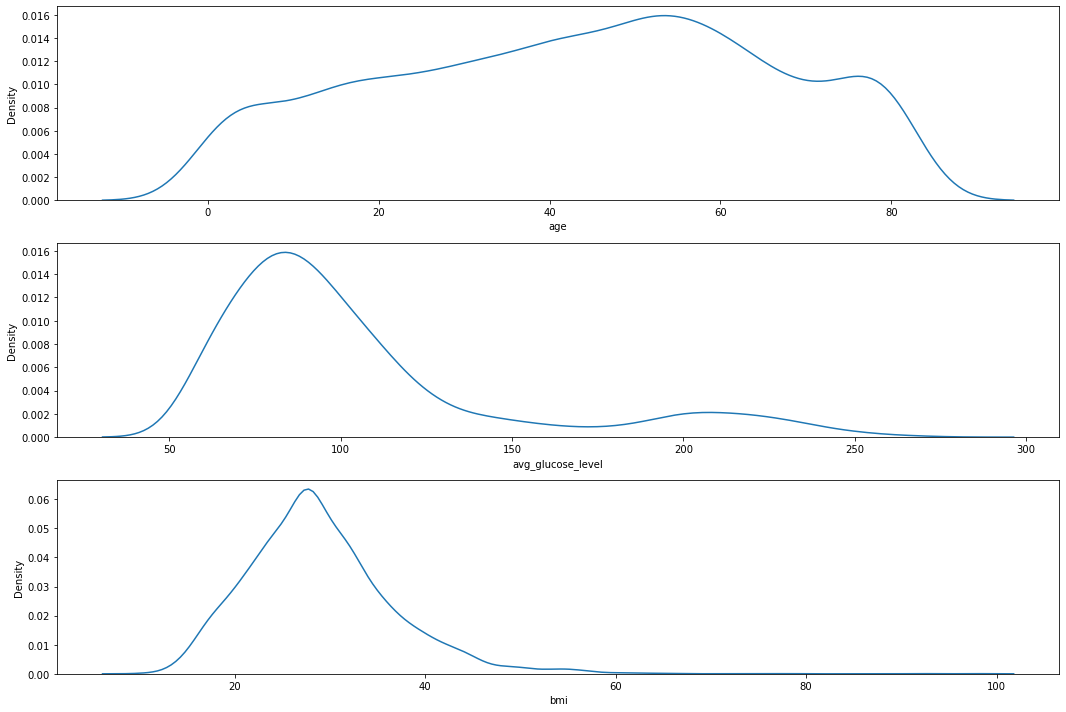

In [19]:
r=3
c=1
itr=1
for i in num.columns:
    mt.subplot(r,c,itr)
    sb.kdeplot(data=stroke,x=i)
    itr+=1
mt.tight_layout()
mt.show()

In [20]:
d={}
for i in num.columns:
    sk=stroke[i].skew()
    d[i]=sk

In [21]:
pd.DataFrame(d.items(),columns=['Variable','Skewness'])

,Variable,Skewness
0,age,-0.140425
1,avg_glucose_level,1.572284
2,bmi,1.074769


* The skewness for average glucose level and bmi is above 0.5 which means they are highly right skewed.
* The variable age seems to be normally distributed.

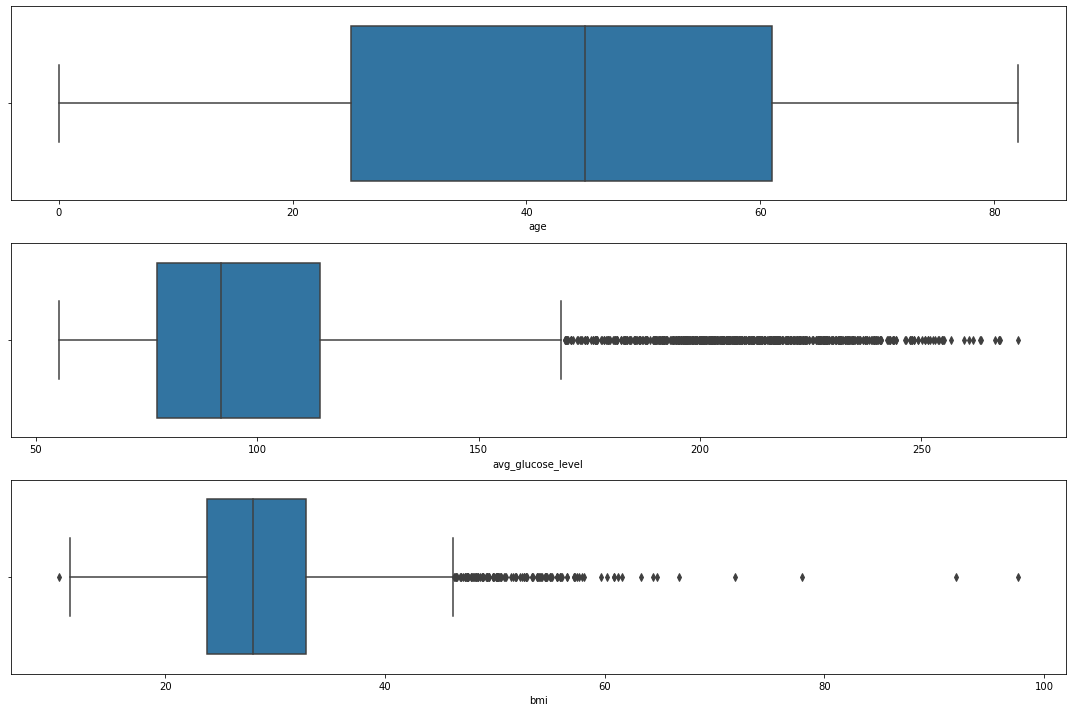

In [22]:
r=3
c=1
itr=1
for i in num.columns:
    mt.subplot(r,c,itr)
    sb.boxplot(data=stroke,x=i)
    itr+=1
mt.tight_layout()
mt.show()

* There are outliers present in average glucose level and bmi.

In [23]:
stroke['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

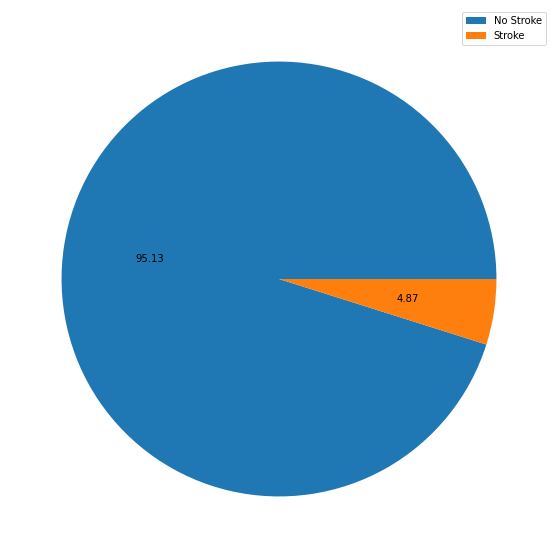

In [24]:
mt.pie(stroke['stroke'].value_counts(),autopct='%.2f')
mt.legend(['No Stroke','Stroke'])
mt.show()

In [25]:
num.columns

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

In [26]:
stroke.drop(columns=['id','age', 'avg_glucose_level', 'bmi','stroke']).head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
0,Male,0,1,Yes,Private,Urban,formerly smoked
1,Female,0,0,Yes,Self-employed,Rural,never smoked
2,Male,0,1,Yes,Private,Rural,never smoked
3,Female,0,0,Yes,Private,Urban,smokes
4,Female,1,0,Yes,Self-employed,Rural,never smoked


In [27]:
cat=stroke.drop(columns=['id','age', 'avg_glucose_level', 'bmi','stroke'])

In [28]:
cat.columns

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status'],
      dtype='object')

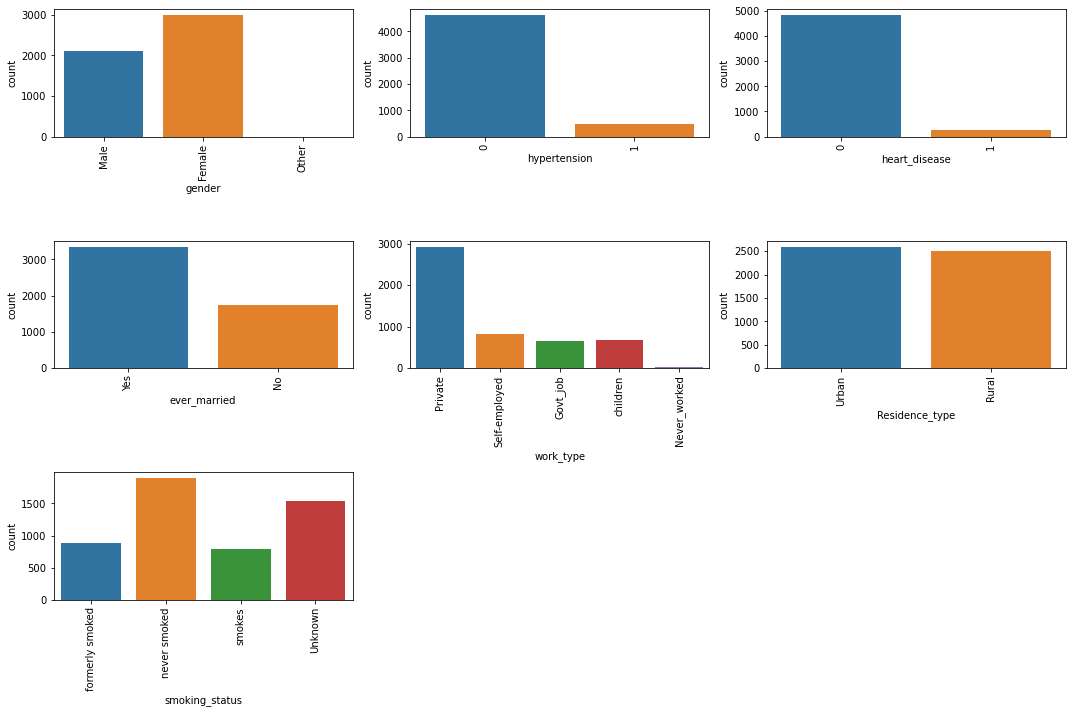

In [29]:
r=3
c=3
itr=1
for i in cat.columns:
    mt.subplot(r,c,itr)
    mt.xticks(rotation=90)
    sb.countplot(data=stroke,x=i)
    itr+=1
mt.tight_layout()
mt.show()

* The gender female has the highest number in the dataset.
* The number of hypertensive cases are low.
* The number of cases with heart diseases are low.
* The number of people who were ever married are high.
* Private workers are at the highest number.
* Residence type are more or less the same.
* People who never smoked are the highest.

## Bivariate Analysis

In [30]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,27.4,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


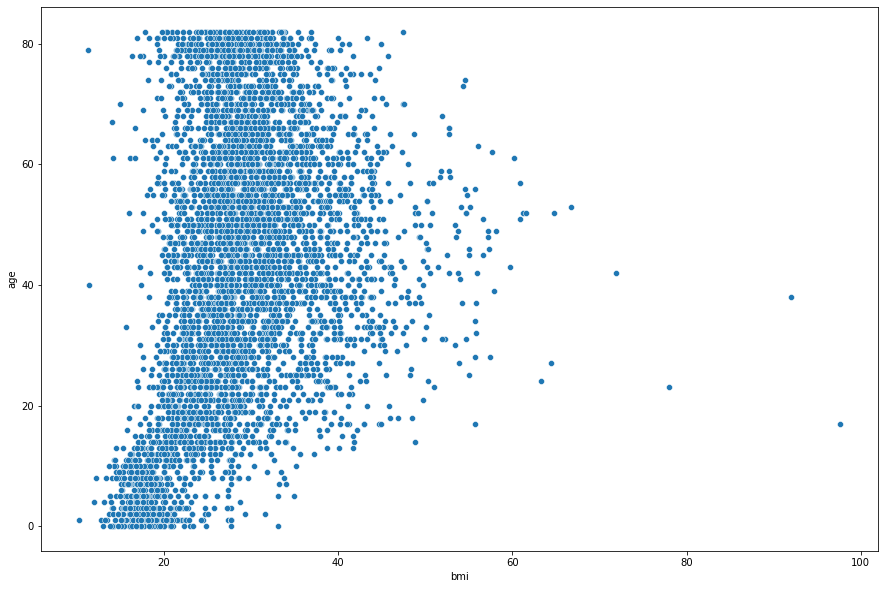

In [31]:
sb.scatterplot(data=stroke, x='bmi', y='age')
mt.show()

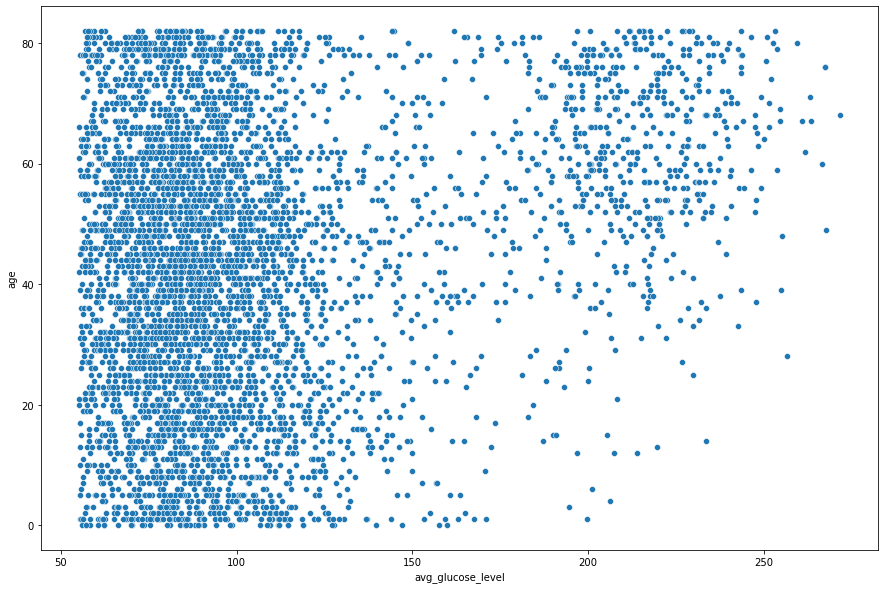

In [32]:
sb.scatterplot(data=stroke, x='avg_glucose_level', y='age')
mt.show()

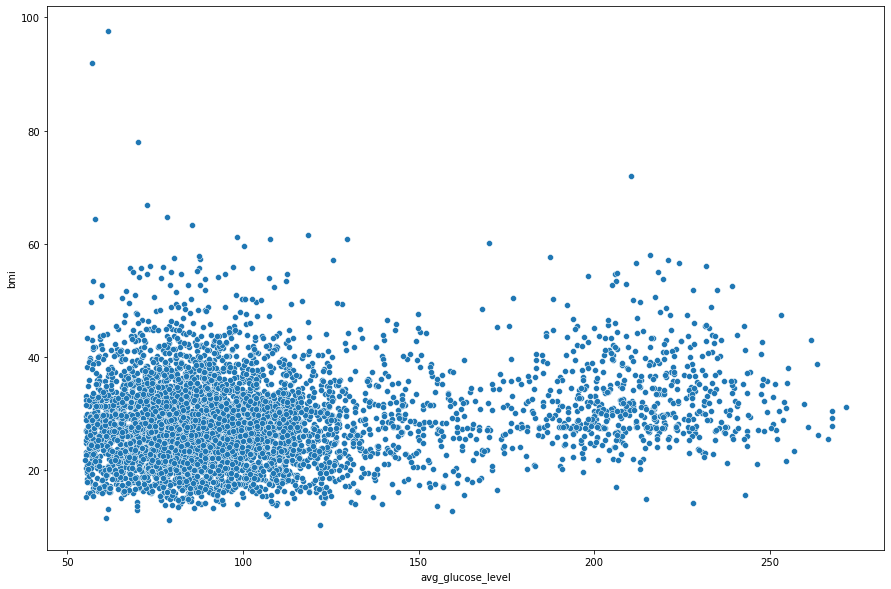

In [33]:
sb.scatterplot(data=stroke, x='avg_glucose_level', y='bmi')
mt.show()

We don't see a pattern among the numerical variables for correlation.

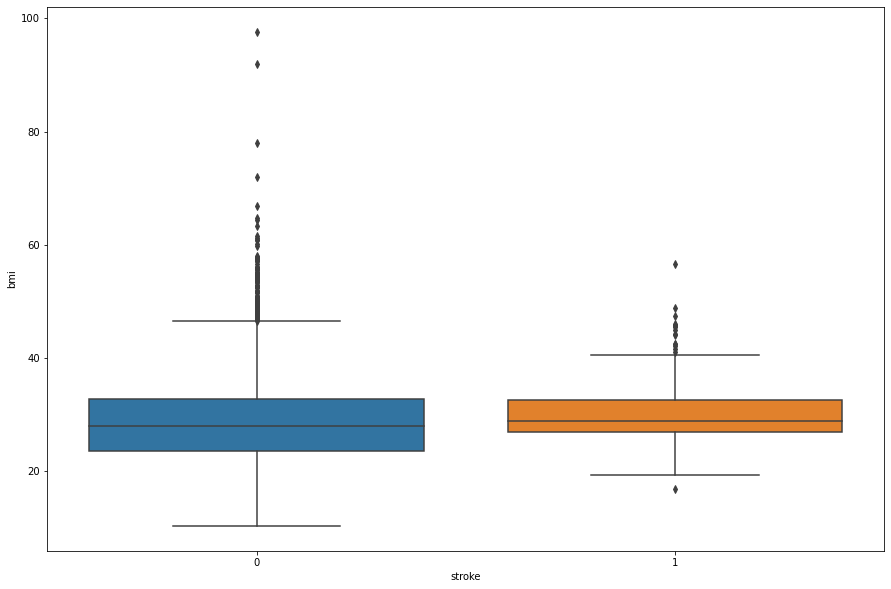

In [34]:
sb.boxplot(data=stroke,x='stroke',y='bmi')
mt.show()

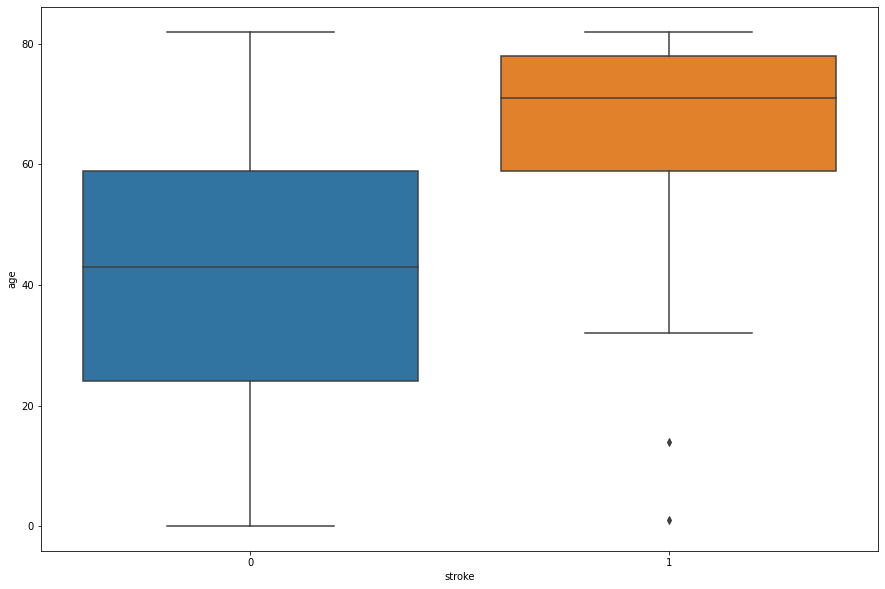

In [35]:
sb.boxplot(data=stroke,x='stroke',y='age')
mt.show()

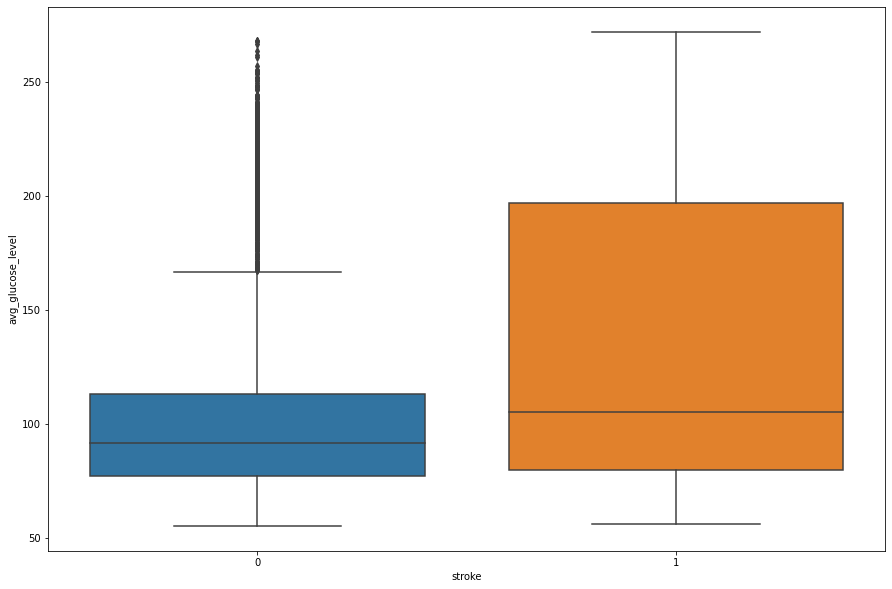

In [36]:
sb.boxplot(data=stroke,x='stroke',y='avg_glucose_level')
mt.show()

In [37]:
stroke.groupby('stroke')[['bmi','age','avg_glucose_level']].describe().T

stroke                             0           1
bmi               count  4861.000000  249.000000
                  mean     28.826527   30.136145
                  std       7.783446    5.879062
                  min      10.300000   16.900000
                  25%      23.600000   27.000000
                  50%      27.900000   28.800000
                  75%      32.800000   32.500000
                  max      97.600000   56.600000
age               count  4861.000000  249.000000
                  mean     41.959679   67.726908
                  std      22.313775   12.734166
                  min       0.000000    1.000000
                  25%      24.000000   59.000000
                  50%      43.000000   71.000000
                  75%      59.000000   78.000000
                  max      82.000000   82.000000
avg_glucose_level count  4861.000000  249.000000
                  mean    104.795513  132.544739
                  std      43.846069   61.921056
                  min      55.120000   56.110000
                  25%      77.120000   79.790000
                  50%      91.470000  105.220000
                  75%     112.830000  196.710000
                  max     267.760000  271.740000

* The average bmi for people having stroke is 30 and for people with no stroke is 28.
* The average age for people having stroke is 67 and people who don't is 41.
* The average glucose level for people having stroke is 132 and those who don't is 105

In [38]:
cat.columns

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status'],
      dtype='object')

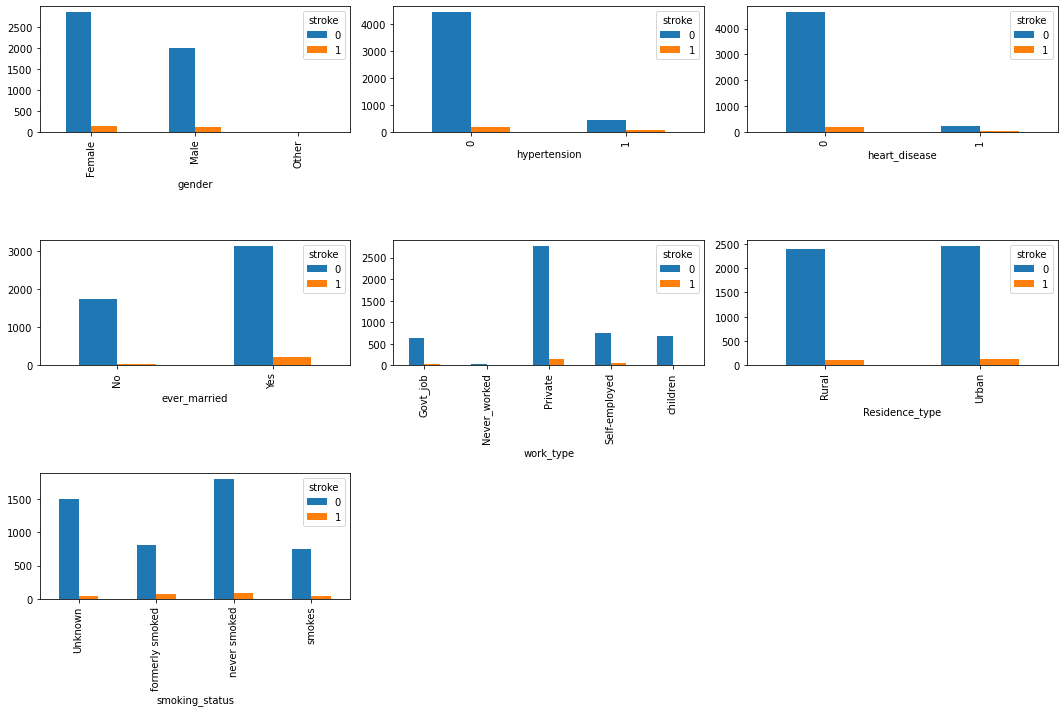

In [39]:
fig,axes=mt.subplots(nrows=3,ncols=3)
pd.crosstab(stroke['gender'],stroke['stroke']).plot(kind='bar',ax=axes[0,0])
pd.crosstab(stroke['hypertension'],stroke['stroke']).plot(kind='bar',ax=axes[0,1])
pd.crosstab(stroke['heart_disease'],stroke['stroke']).plot(kind='bar',ax=axes[0,2])
pd.crosstab(stroke['ever_married'],stroke['stroke']).plot(kind='bar',ax=axes[1,0])
pd.crosstab(stroke['work_type'],stroke['stroke']).plot(kind='bar',ax=axes[1,1])
pd.crosstab(stroke['Residence_type'],stroke['stroke']).plot(kind='bar',ax=axes[1,2])
pd.crosstab(stroke['smoking_status'],stroke['stroke']).plot(kind='bar',ax=axes[2,0])
mt.tight_layout()
mt.delaxes(axes[2,1])
mt.delaxes(axes[2,2])
mt.show()

In [40]:
stroke=stroke.drop(columns='id')

In [41]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,27.4,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Hypothesis testing for significance of variables.

Null Hypothesis: The categorical variables are not significant over the target stroke.
    
Alternate Hypothesis: he categorical variables are significant over the target stroke.

We are gonna perform Chi Square contingency test for categorical variables.

In [42]:
cat.columns

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status'],
      dtype='object')

In [43]:
d={}
for i in cat.columns:
    ctab=pd.crosstab(stroke[i],stroke['stroke'])
    chi_stat,chi_pval,dof,exp=stats.chi2_contingency(observed=ctab, correction=True)
    d[i]=chi_pval

In [44]:
pval_df=pd.DataFrame(d.items(),columns=['Feature','P-Val'])
pval_df

,Feature,P-Val
0,gender,7.895491e-01
1,hypertension,1.661622e-19
2,heart_disease,2.088785e-21
3,ever_married,1.638902e-14
4,work_type,5.397708e-10
5,Residence_type,2.983317e-01
6,smoking_status,2.085400e-06


In [45]:
pval_df[pval_df['P-Val']<0.05]

,Feature,P-Val
1,hypertension,1.661622e-19
2,heart_disease,2.088785e-21
3,ever_married,1.638902e-14
4,work_type,5.397708e-10
6,smoking_status,2.085400e-06


The above variables are statistically significant which have rejected null hypothesis.

The variable gender fails to reject null hypothesis so it is not statistically significant.

But we need to retain the variable for further tests until a good metric is obtained.

## Feature Engineering

In [46]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,27.4,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [47]:
obj=stroke.select_dtypes('object')
obj.columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [48]:
stroke['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [49]:
stroke['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [50]:
stroke['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [51]:
stroke['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [52]:
stroke['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le=LabelEncoder()

In [55]:
stroke['gender']=le.fit_transform(stroke[['gender']])

In [56]:
stroke['ever_married']=le.fit_transform(stroke[['ever_married']])

In [57]:
stroke['Residence_type']=le.fit_transform(stroke[['Residence_type']])

In [58]:
stroke['smoking_status']=le.fit_transform(stroke[['smoking_status']])

In [59]:
stroke['work_type'].value_counts()/len(stroke)

Private          0.572407
Self-employed    0.160274
children         0.134442
Govt_job         0.128571
Never_worked     0.004305
Name: work_type, dtype: float64

In [60]:
freq_enc={'Private':0.565810, 'children':0.175931, 'Self-employed':0.129523, 'Govt_job':0.122968, 'Never_worked': 0.005768}

In [61]:
stroke['work_type']=stroke['work_type'].map(freq_enc)

In [62]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,0.565810,1,228.69,36.6,1,1
1,0,61,0,0,1,0.129523,0,202.21,27.4,2,1
2,1,80,0,1,1,0.565810,0,105.92,32.5,2,1
3,0,49,0,0,1,0.565810,1,171.23,34.4,3,1
4,0,79,1,0,1,0.129523,0,174.12,24.0,2,1


The values of each categorical variable have been encoded based on the values and nature.

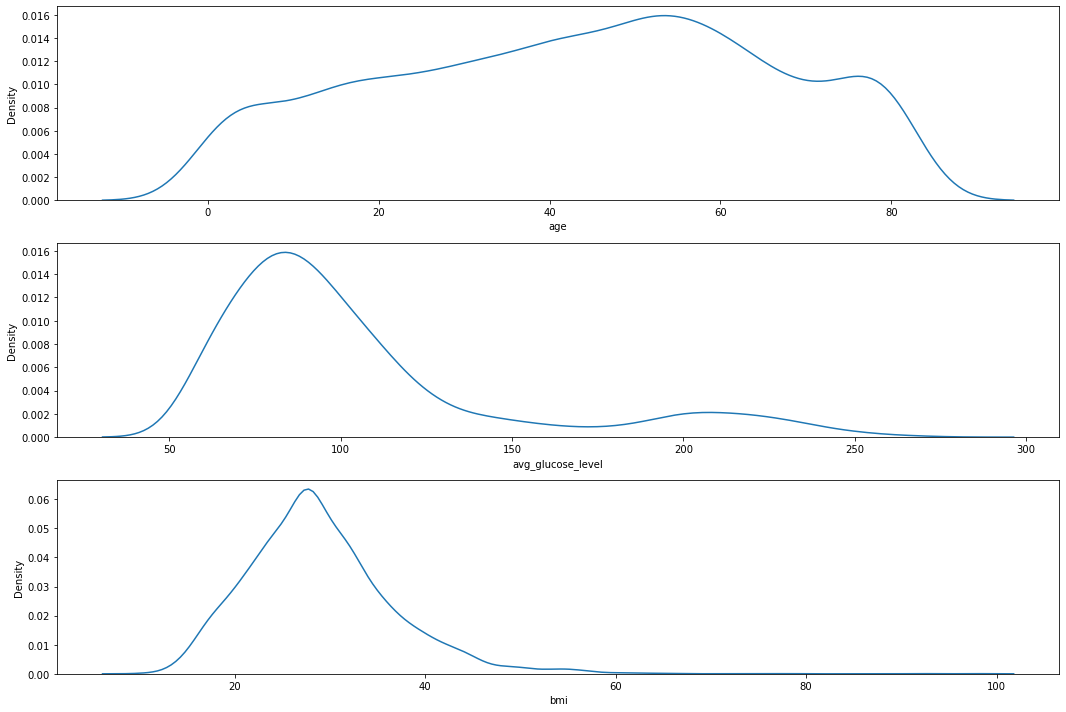

In [63]:
r=3
c=1
itr=1
for i in num.columns:
    mt.subplot(r,c,itr)
    sb.kdeplot(data=stroke,x=i)
    itr+=1
mt.tight_layout()
mt.show()

In [64]:
num_cols=['age', 'avg_glucose_level', 'bmi']

In [65]:
dsk={}
for i in num_cols:
    sk=stroke[i].skew()
    dsk[i]=sk

In [66]:
pd.DataFrame(dsk.items(),columns=['Variable','Skewness'])

,Variable,Skewness
0,age,-0.140425
1,avg_glucose_level,1.572284
2,bmi,1.074769


In [67]:
dkr={}
for i in num_cols:
    kr=stroke[i].kurt()
    dkr[i]=kr

In [68]:
pd.DataFrame(dkr.items(),columns=['Variable','Kurtosis'])

,Variable,Kurtosis
0,age,-0.985714
1,avg_glucose_level,1.680479
2,bmi,3.596552


All the numerical variables are positively skewed and the kurtosis is less than 3 and they are platykurtic.

## Transformation

In [69]:
num_cols

['age', 'avg_glucose_level', 'bmi']

In [70]:
stroke[stroke[num_cols]<0].value_counts()

Series([], dtype: int64)

None of the variables have a negative value so we can apply log transform to each numeric variable.

In [71]:
for i in ['avg_glucose_level', 'bmi']:
    stroke[i]=np.log(stroke[i])

In [72]:
stroke[['age','avg_glucose_level', 'bmi']].skew()

age                 -0.140425
avg_glucose_level    0.882751
bmi                 -0.011544
dtype: float64

We can see that the skewness have been reduced after transformation.

## Train Test Split

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,0.565810,1,5.432367,3.600048,1,1
1,0,61,0,0,1,0.129523,0,5.309307,3.310543,2,1
2,1,80,0,1,1,0.565810,0,4.662684,3.481240,2,1
3,0,49,0,0,1,0.565810,1,5.143008,3.538057,3,1
4,0,79,1,0,1,0.129523,0,5.159745,3.178054,2,1


In [75]:
x=stroke.drop(columns='stroke')

In [76]:
y=stroke['stroke']

In [77]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,train_size=0.7,random_state=8)

In [78]:
print(xtrain.shape,xtest.shape)

(3577, 10) (1533, 10)


In [79]:
print(ytrain.shape,ytest.shape)

(3577,) (1533,)


## Data imbalance

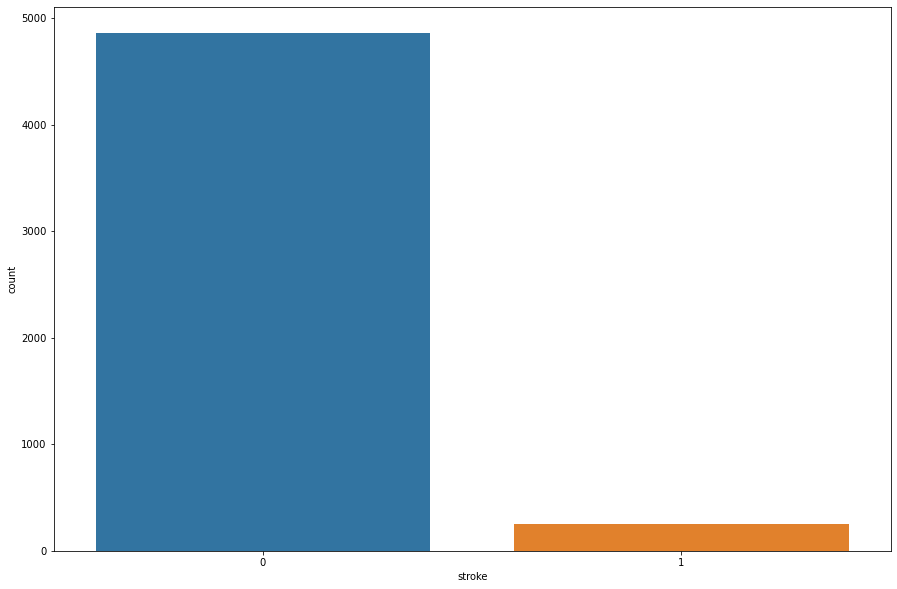

In [80]:
sb.countplot(data=stroke, x='stroke')
mt.show()

* The provided dataset consists of an imbalance in the dataset.
* Imbalanced distribution leads to high bias for the model to predict.
* Hence it is always the best to balance the data before building a model.
* In this case we are going to create artificial datapoints using a method called SMOTE (Synethetic Minority Oversampling technique)
* This oversampling technique helps to increase the number of datapoints of the selected or uneven class to the desired ratio and level up accordingly for the model.

In [81]:
from collections import Counter

In [82]:
Counter(y)

Counter({1: 249, 0: 4861})

In [142]:
from imblearn.over_sampling import SMOTE

In [143]:
smote=SMOTE(sampling_strategy=0.6, random_state=10)

In [144]:
x_sm1,y_sm1=smote.fit_resample(x,y)

In [145]:
print('Before Oversampling',Counter(y))

Before Oversampling Counter({0: 4861, 1: 249})


In [146]:
print('After Oversampling',Counter(y_sm1))

After Oversampling Counter({0: 4861, 1: 2916})


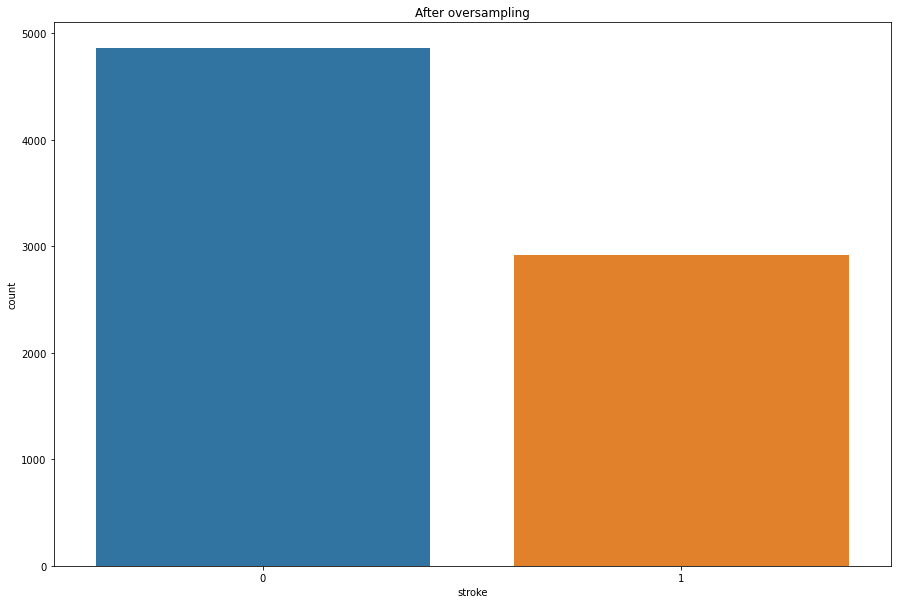

In [147]:
mt.title('After oversampling')
sb.countplot(data=pd.DataFrame(y_sm1),x='stroke')
mt.show()

In [148]:
ovs_data=pd.concat([x_sm1,y_sm1],axis=1)

In [149]:
xs=ovs_data.drop(columns='stroke')
ys=ovs_data['stroke']

In [150]:
xstr,xste,ystr,yste=train_test_split(xs,ys,train_size=0.7,random_state=8)

In [151]:
print(xstr.shape,xste.shape)

(5443, 10) (2334, 10)


In [152]:
print(ystr.shape,yste.shape)

(5443,) (2334,)


## Model Building

In [153]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score,recall_score, precision_score

In [154]:
import statsmodels.api as sma

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [156]:
from xgboost import XGBClassifier 

## Logistic Regression

In [157]:
lstat=sma.Logit(ystr, sma.add_constant(xstr)).fit()

Optimization terminated successfully.
         Current function value: 0.446930
         Iterations 7


In [158]:
lstat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 5443
Model:                          Logit   Df Residuals:                     5432
Method:                           MLE   Df Model:                           10
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:                  0.3255
Time:                        15:50:08   Log-Likelihood:                -2432.6
converged:                       True   LL-Null:                       -3606.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -10.0094      0.721    -13.888      0.000     -11.422      -8.597
gender               -0.6524      0.076     -8.548      0.000      -0.802      -0.503
age                   0.0847      0.003     32.264      0.000       0.080       0.090
hypertension         -0.4459      0.104     -4.304      0.000      -0.649      -0.243
heart_disease        -0.7351      0.139     -5.302      0.000      -1.007      -0.463
ever_married         -0.5454      0.103     -5.279      0.000      -0.748      -0.343
work_type             0.5187      0.182      2.855      0.004       0.163       0.875
Residence_type       -0.7377      0.073    -10.145      0.000      -0.880      -0.595
avg_glucose_level     0.7673      0.093      8.230      0.000       0.585       0.950
bmi                   0.6725      0.188      3.570      0.000       0.303       1.042
smoking_status       -0.2150      0.037     -5.863      0.000      -0.287      -0.143
=====================================================================================
"""

In [159]:
lspred=lstat.predict(sma.add_constant(xste))

In [160]:
def log(val):
    if val<0.5:
        return 0
    else:
        return 1
lspred=lspred.apply(log)

In [161]:
accuracy_score(lspred,yste)

0.7874892887746359

In [162]:
fpr,tpr,thres=roc_curve(lspred,yste)

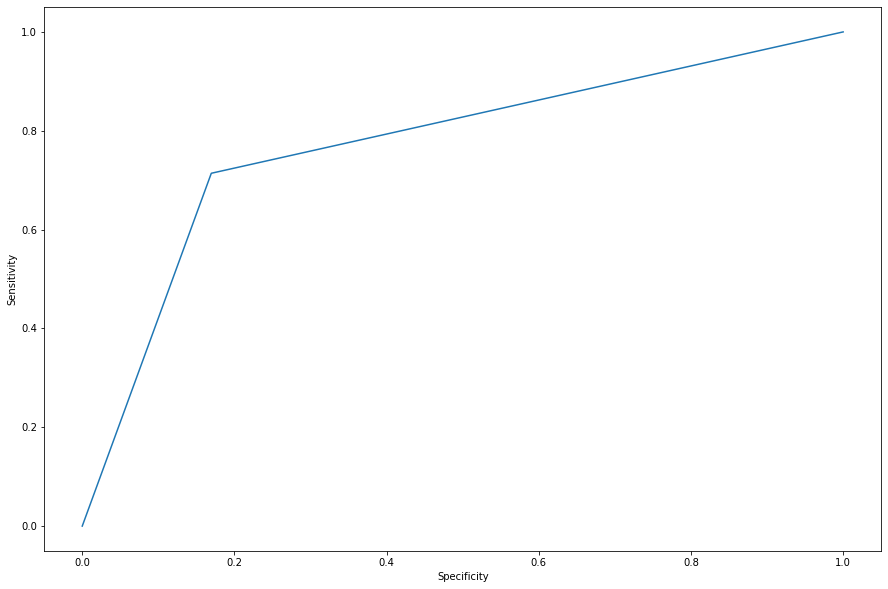

In [163]:
mt.plot(fpr,tpr)
mt.xlabel('Specificity')
mt.ylabel('Sensitivity')
mt.show()

In [164]:
roc_auc_score(lspred,yste)

0.772173487740999

In [165]:
cm=confusion_matrix(lspred,yste)

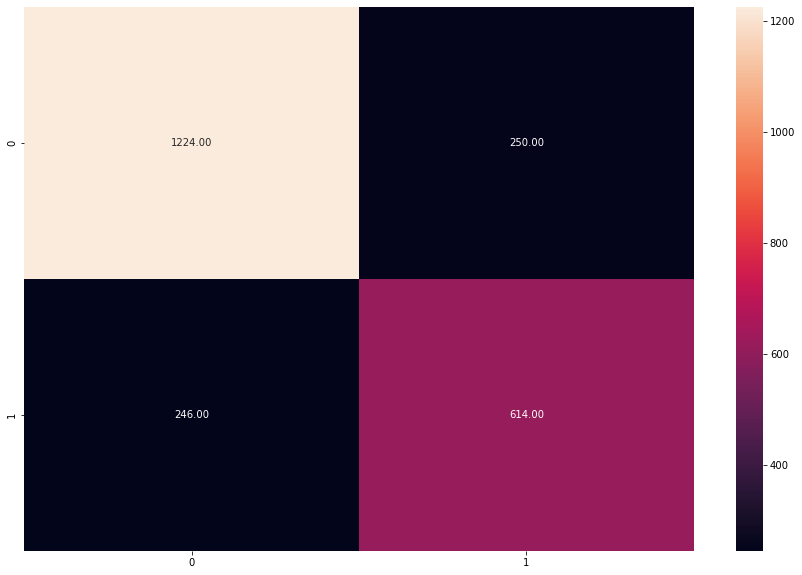

In [166]:
sb.heatmap(cm,annot=True,fmt='.2f')
mt.show()

In [167]:
print(classification_report(lspred,yste))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1474
           1       0.71      0.71      0.71       860

    accuracy                           0.79      2334
   macro avg       0.77      0.77      0.77      2334
weighted avg       0.79      0.79      0.79      2334



In [168]:
lr_acc=accuracy_score(lspred,yste)
lr_f1=f1_score(lspred,yste)
lr_recall=recall_score(lspred,yste)

## Decision Tree Classifier

In [169]:
dt=DecisionTreeClassifier(criterion='gini',random_state=8)

In [170]:
dt.fit(xstr,ystr)

DecisionTreeClassifier(random_state=8)

In [171]:
dtpred=dt.predict(xste)

In [172]:
accuracy_score(yste,dtpred)

0.8984575835475579

In [173]:
fpr,tpr,thres=roc_curve(yste,dtpred)

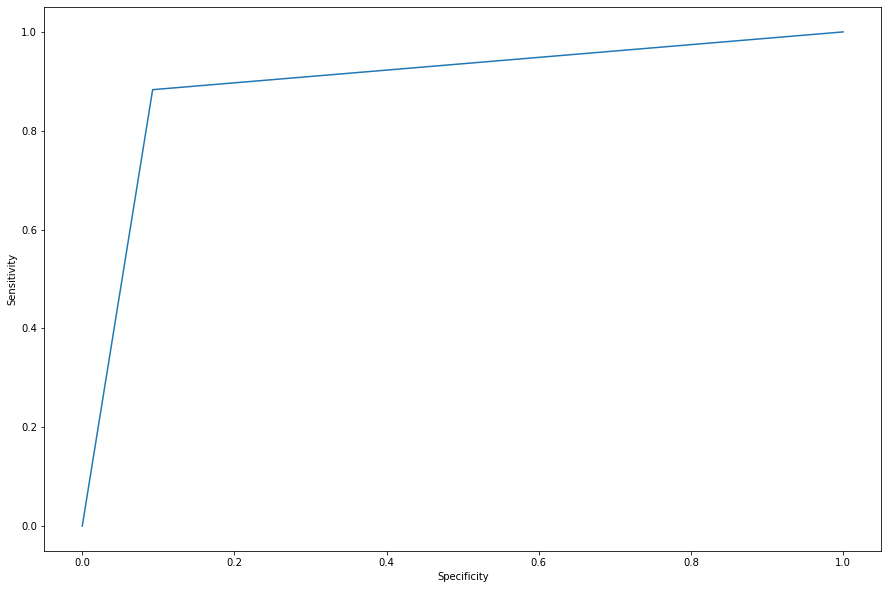

In [174]:
mt.plot(fpr,tpr)
mt.xlabel('Specificity')
mt.ylabel('Sensitivity')
mt.show()

In [175]:
roc_auc_score(yste,dtpred)

0.8952924225245654

In [176]:
cm=confusion_matrix(yste,dtpred)

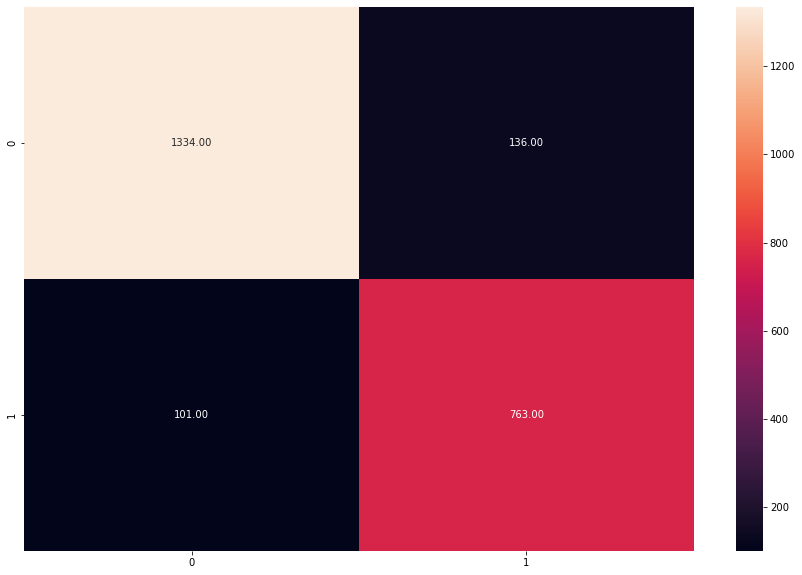

In [177]:
sb.heatmap(cm,annot=True,fmt='.2f')
mt.show()

In [178]:
print(classification_report(yste,dtpred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1470
           1       0.85      0.88      0.87       864

    accuracy                           0.90      2334
   macro avg       0.89      0.90      0.89      2334
weighted avg       0.90      0.90      0.90      2334



In [179]:
fea_imp=pd.DataFrame()

In [180]:
fea_imp['Feature']=xstr.columns
fea_imp['Importance']=dt.feature_importances_

In [181]:
fea_imp=fea_imp.sort_values(by='Importance',ascending=False)

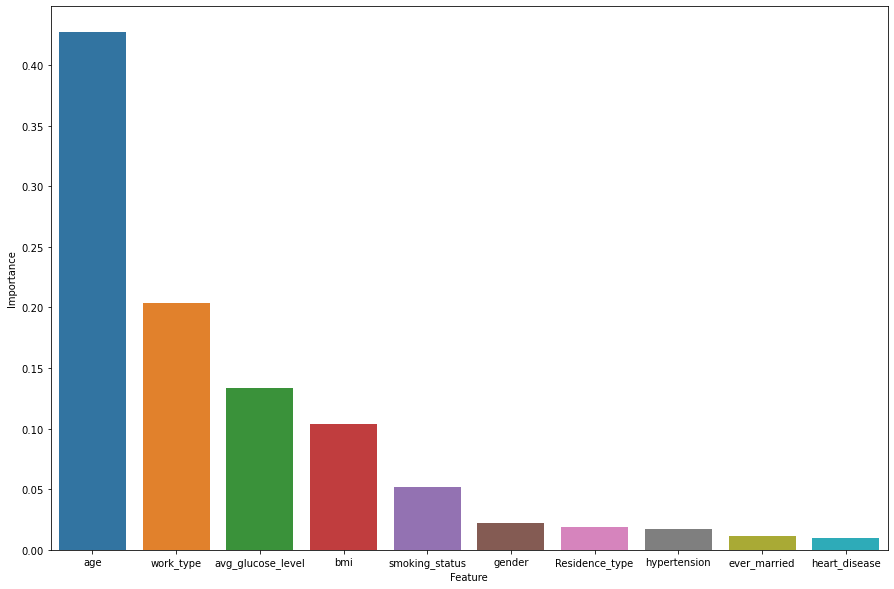

In [182]:
sb.barplot(data=fea_imp,x='Feature',y='Importance')
mt.show()

In [183]:
dt_acc=accuracy_score(dtpred,yste)
dt_f1=f1_score(dtpred,yste)
dt_recall=recall_score(dtpred,yste)

## Random Forest Classifier

In [184]:
rf=RandomForestClassifier()

In [185]:
from sklearn.model_selection import GridSearchCV

In [186]:
params=({'criterion':['gini','entropy'], 'max_depth' :[3,5,6,7,8], 
        'n_estimators':[60,80,100,110]})

In [187]:
grid=GridSearchCV(estimator=rf,param_grid=params,scoring='accuracy')

In [188]:
grid.fit(xstr,ystr)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 6, 7, 8],
                         'n_estimators': [60, 80, 100, 110]},
             scoring='accuracy')

In [189]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 100}

In [190]:
rf=RandomForestClassifier(criterion='gini', max_depth=8, n_estimators=110)

In [191]:
rf.fit(xstr,ystr)

RandomForestClassifier(max_depth=8, n_estimators=110)

In [192]:
rfpred=rf.predict(xste)

In [193]:
accuracy_score(yste,rfpred)

0.8920308483290489

In [194]:
fpr,tpr,thres=roc_curve(yste,rfpred)

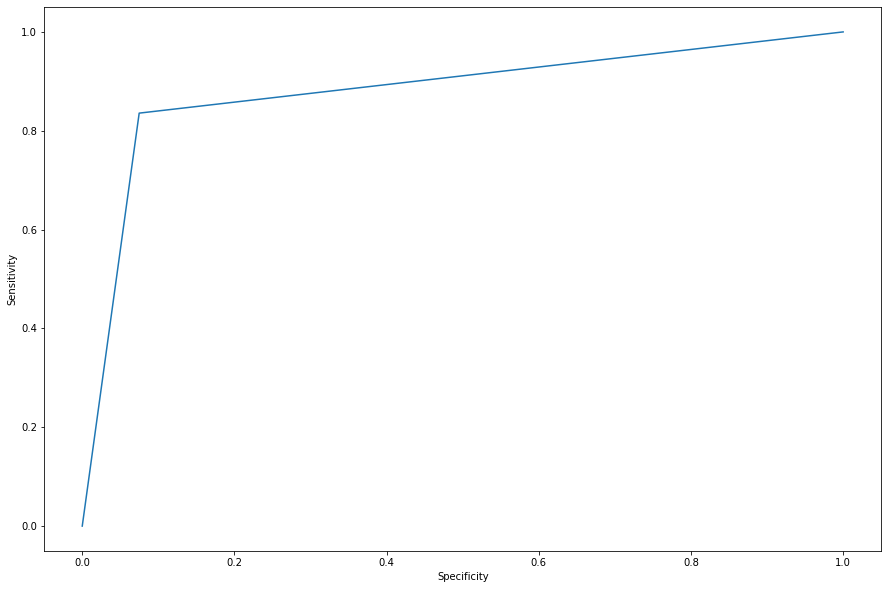

In [195]:
mt.plot(fpr,tpr)
mt.xlabel('Specificity')
mt.ylabel('Sensitivity')
mt.show()

In [196]:
roc_auc_score(yste,rfpred)

0.8804091080876795

In [197]:
cm=confusion_matrix(yste,rfpred)

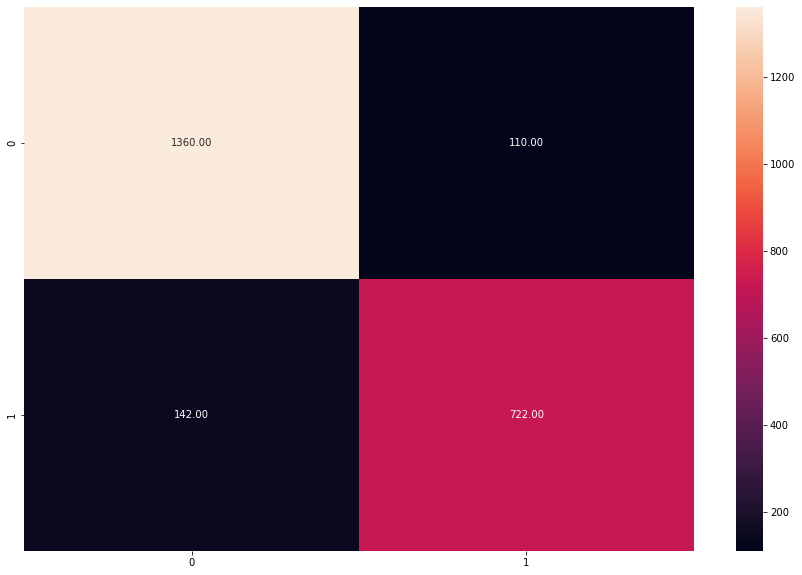

In [198]:
sb.heatmap(cm,annot=True,fmt='.2f')
mt.show()

In [199]:
print(classification_report(yste,rfpred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1470
           1       0.87      0.84      0.85       864

    accuracy                           0.89      2334
   macro avg       0.89      0.88      0.88      2334
weighted avg       0.89      0.89      0.89      2334



In [200]:
rf_acc=accuracy_score(rfpred,yste)
rf_f1=f1_score(rfpred,yste)
rf_recall=recall_score(rfpred,yste)

## Bagging

In [201]:
from sklearn.ensemble import BaggingClassifier

In [202]:
dt=DecisionTreeClassifier()

In [203]:
bg=BaggingClassifier(base_estimator=dt,bootstrap=True, bootstrap_features=True, random_state=8)

In [204]:
bg.fit(xstr,ystr)

BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                  bootstrap_features=True, random_state=8)

In [205]:
bgpred=bg.predict(xste)

In [206]:
accuracy_score(bgpred,yste)

0.901885175664096

In [207]:
fpr,tpr,thres=roc_curve(yste,bgpred)

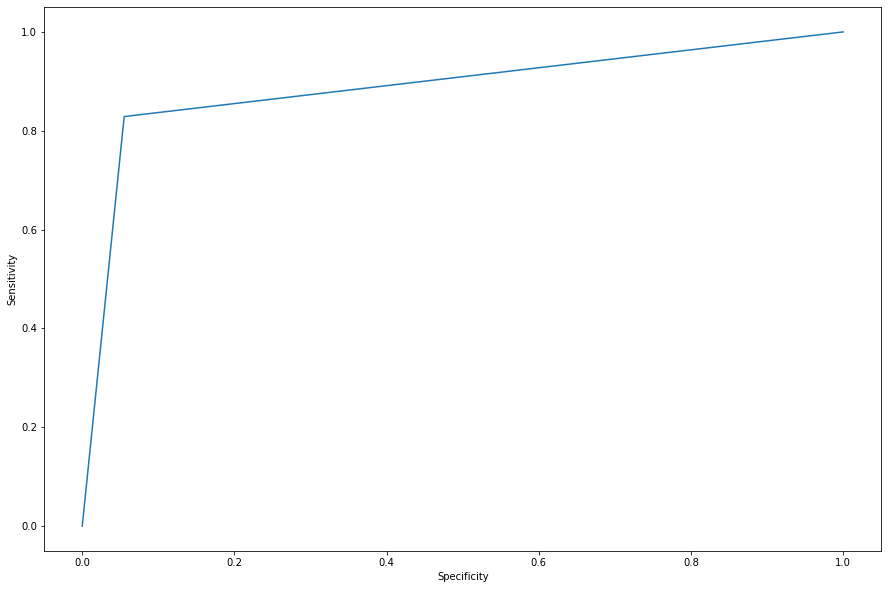

In [208]:
mt.plot(fpr,tpr)
mt.xlabel('Specificity')
mt.ylabel('Sensitivity')
mt.show()

In [209]:
cm=confusion_matrix(yste,bgpred)

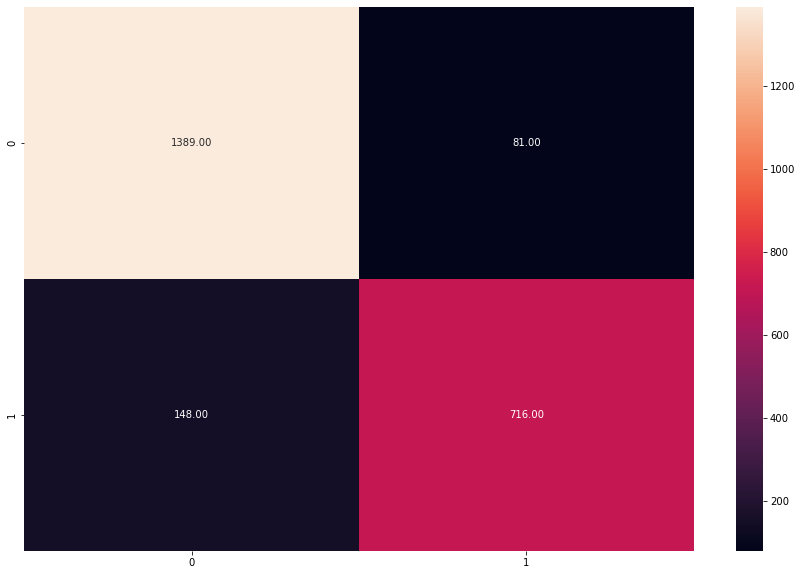

In [210]:
sb.heatmap(cm,annot=True,fmt='.2f')
mt.show()

In [211]:
print(classification_report(yste,bgpred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1470
           1       0.90      0.83      0.86       864

    accuracy                           0.90      2334
   macro avg       0.90      0.89      0.89      2334
weighted avg       0.90      0.90      0.90      2334



In [212]:
bg_acc=accuracy_score(bgpred,yste)
bg_f1=f1_score(bgpred,yste)
bg_recall=recall_score(bgpred,yste)

## Boosting

In [213]:
from sklearn.ensemble import GradientBoostingClassifier

In [217]:
gbc=GradientBoostingClassifier()

In [220]:
params=({'loss':['log_loss', 'deviance', 'exponential'],'n_estimators':[60,80,110]})

In [222]:
grid=GridSearchCV(param_grid=params,estimator=gbc,scoring='accuracy')

In [223]:
grid.fit(xstr,ystr)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'loss': ['log_loss', 'deviance', 'exponential'],
                         'n_estimators': [60, 80, 110]},
             scoring='accuracy')

In [224]:
grid.best_params_

{'loss': 'exponential', 'n_estimators': 110}

In [225]:
gbc=GradientBoostingClassifier(loss='exponential',n_estimators=110)

In [226]:
gbc.fit(xstr,ystr)

GradientBoostingClassifier(loss='exponential', n_estimators=110)

In [227]:
gbpred=gbc.predict(xste)

In [228]:
accuracy_score(gbpred,yste)

0.8748928877463582

In [229]:
fpr,tpr,thres=roc_curve(yste,gbpred)

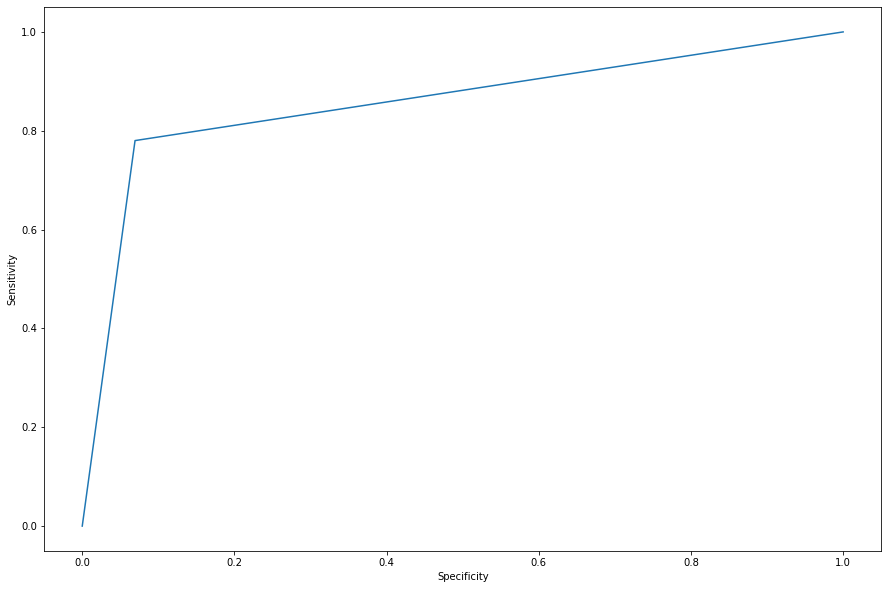

In [231]:
mt.plot(fpr,tpr)
mt.xlabel('Specificity')
mt.ylabel('Sensitivity')
mt.show()

In [232]:
cm=confusion_matrix(yste,gbpred)

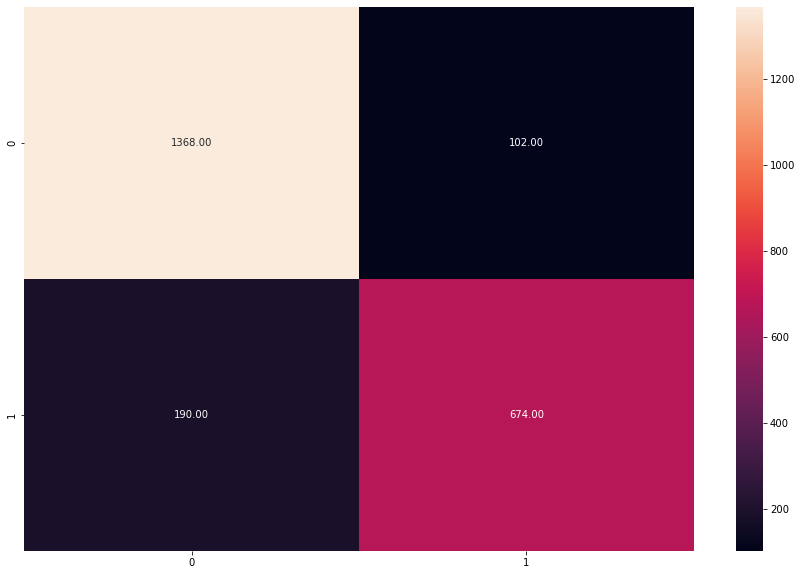

In [233]:
sb.heatmap(cm,annot=True,fmt='.2f')
mt.show()

In [234]:
print(classification_report(yste,gbpred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1470
           1       0.87      0.78      0.82       864

    accuracy                           0.87      2334
   macro avg       0.87      0.86      0.86      2334
weighted avg       0.87      0.87      0.87      2334



In [235]:
gb_acc=accuracy_score(gbpred,yste)
gb_f1=f1_score(gbpred,yste)
gb_recall=recall_score(gbpred,yste)

## Model Metrics and Result

In [ ]:
lr_acc
lr_f1
lr_recall

In [246]:
result=pd.DataFrame(columns=['Model','Accuracy','F1-Score','Recall Score'])

In [247]:
result['Model']=['Logistic','Decision Tree','Random Forest','Bagging','Boosting']
result['Accuracy']=[lr_acc,dt_acc,rf_acc,bg_acc,gb_acc]
result['F1-Score']=[lr_f1,dt_f1,rf_f1,bg_f1,gb_f1]
result['Recall Score']=[lr_recall,dt_recall,rf_recall,bg_recall,gb_recall]

In [248]:
result

,Model,Accuracy,F1-Score,Recall Score
0,Logistic,0.787489,0.712297,0.713953
1,Decision Tree,0.898458,0.865570,0.848721
2,Random Forest,0.892031,0.851415,0.867788
3,Bagging,0.901885,0.862131,0.898369
4,Boosting,0.874893,0.821951,0.868557


In [252]:
result=result.sort_values(by='Accuracy',ascending=False)

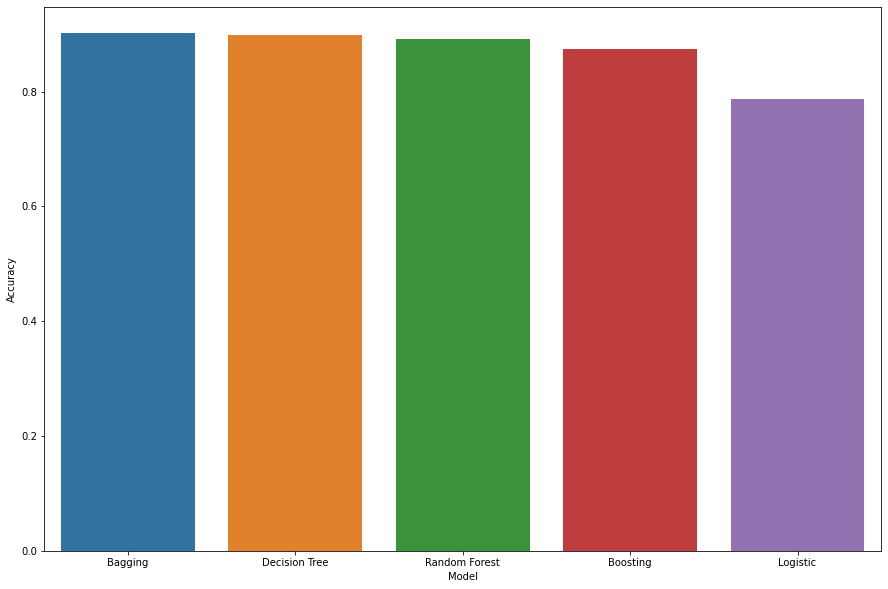

In [254]:
sb.barplot(data=result,x='Model',y='Accuracy')
mt.show()

From the analysis we can see that Bagging Classifier performs really well to predict the class of stroke.